<a href="https://colab.research.google.com/github/JeanRintoul/Covid-19/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Comparisons. 

Data is taken from John Hopkins data set which is updated nightly on github. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in long_scalars


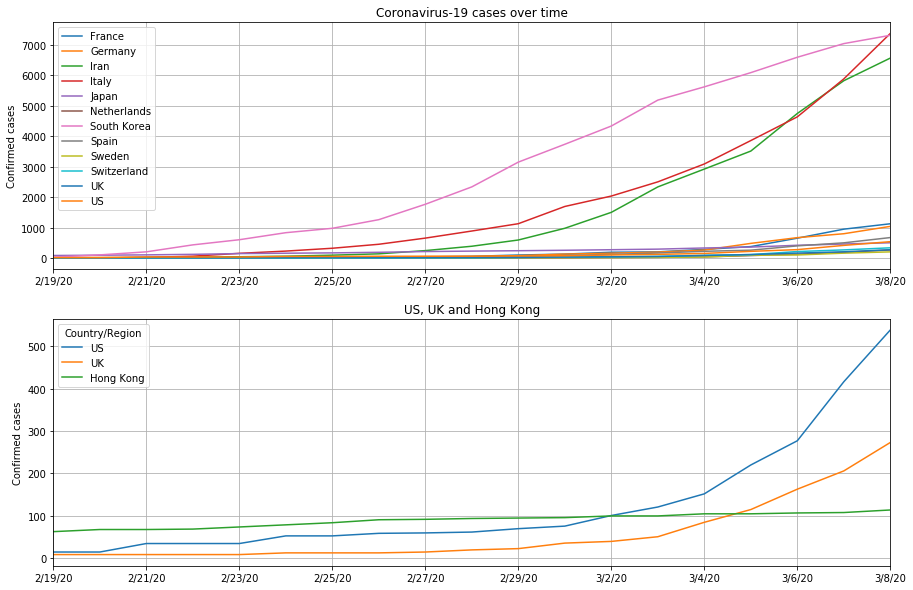

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

confirmed_csv = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
dead_csv      = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
recovered_csv = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
confirmed = pd.read_csv(confirmed_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
dead      = pd.read_csv(dead_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
recovered = pd.read_csv(recovered_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
# toggle these thresholds to select countries to display in the time series. 
min_threshold_confirmed_cases = 200
max_threshold_confirmed_cases = 20000 # let's remove china for now. 
min2_threshold_confirmed_cases = 100
max2_threshold_confirmed_cases = 100000 # let's remove china for now. 
columns = list(confirmed)
selected  = []
deaths    = []
mortality_rate = []
all_mortality_rate = []
counts = []
for i in columns: 
    if min_threshold_confirmed_cases < confirmed[i][-1] < max_threshold_confirmed_cases and i != 'Others': 
      selected.append(i)
      deaths.append(dead[i][-1])
      mortality_rate.append(100*(dead[i][-1])/confirmed[i][-1])

    if min2_threshold_confirmed_cases < confirmed[i][-1] < max2_threshold_confirmed_cases and i != 'Others':       
      counts.append(i)
      all_mortality_rate.append(100*(dead[i][-1])/(recovered[i][-1] + (dead[i][-1])  ))
#print(len(confirmed))

subset = confirmed.loc[:,selected]
USvsUK = confirmed.loc[:,['US','UK','Hong Kong']]

fig, (ax1, ax2) = plt.subplots(2,figsize=(15, 10))
subset[28:].plot(ax=ax1, grid='on')
ax1.legend(loc='upper left')
ax1.set_title('Coronavirus-19 cases over time')
ax1.set_ylabel('Confirmed cases')
# second plot is US and UK curves
USvsUK[28:].plot(ax=ax2, grid='on')
ax2.set_ylabel('Confirmed cases')
ax2.set_title('US, UK and Hong Kong');


The countries closest to China appear to have the most linear trends. Those in other parts of the world are rising exponentially. Why?

Now plot the daily rise for a given country as a bar chart. 

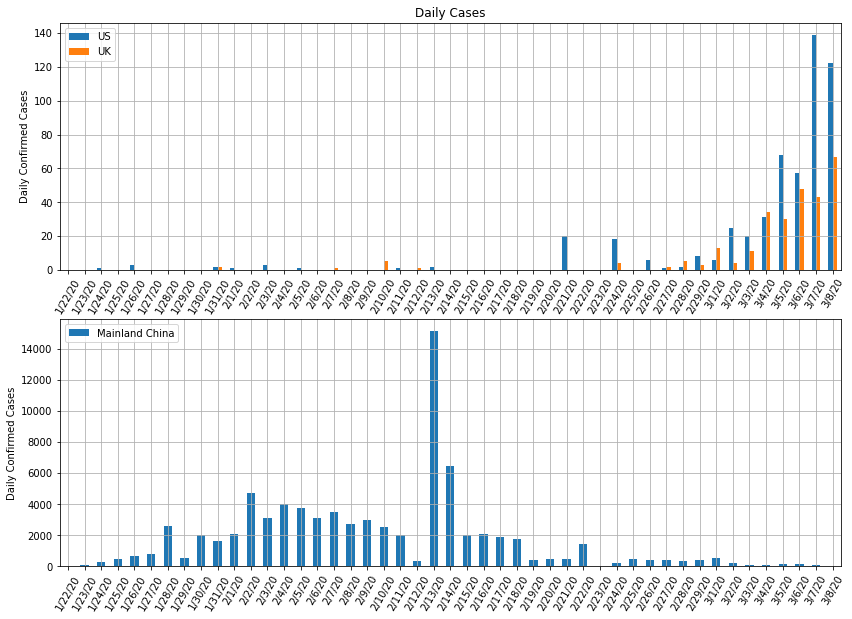

In [71]:
# compare country rates per day.
country  = 'US'
country2 = 'UK'
country3 = 'Mainland China'
daily = confirmed.diff(periods=1,axis=0).copy()

c1 = daily[country]
c2 = daily[country2]
c3 = daily[country3]
df = pd.DataFrame({country:c1, country2:c2})
dt = pd.DataFrame({country3:c3})

fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
df.plot.bar(ax=ax1,rot=60,grid='on')
ax1.set_ylabel('Daily Confirmed Cases')
ax1.set_title('Daily Cases')
ax1.legend(loc='upper left')
dt.plot.bar(ax=ax2,rot=60,grid='on')
ax2.set_ylabel('Daily Confirmed Cases')
#ax2.set_title('Mainland China');
ax2.legend(loc='upper left');

# Growth rate per country, estimated based on the last 24 hours.

Here we'd put number of days it takes to double. 100((Present-Past)/Past

# Identifying the mortality rate


How should we estimate the mortality rate? 
The proportion of closed cases was my initial guess, although the WHO thinks otherwise and gets a 3.4% mortality rate. It's difficult to estimate as many people never become confirmed cases as they are never tested. 



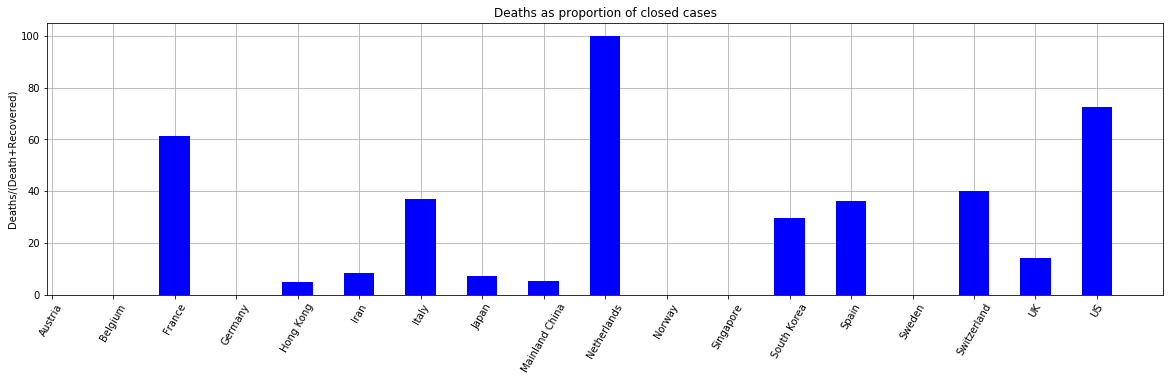

In [54]:
fig, (ax1) = plt.subplots(1,figsize=(20, 5))
ax1.grid(zorder=0)
ax1.bar(counts,all_mortality_rate, width=0.5, color='b', align='center',zorder = 3)
#threshold = 3.4 # this is the WHO mortality estimation on March 3. 
#ax1.plot([0., 18.0], [threshold, threshold], "k--")
ax1.set_ylabel('Deaths/(Death+Recovered)')
ax1.set_title('Deaths as proportion of closed cases')
ax1.set_xticklabels(counts,rotation=60);

# China vs the rest of the world.


China cases vs the rest of the world. 
Confirmed cases in two bins, one China, one rest of world. 



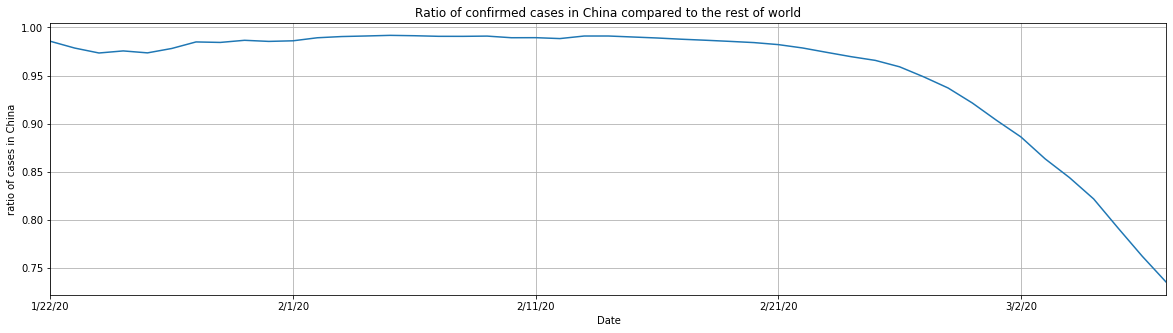

In [55]:
df = confirmed.copy()
df['everywhere_else'] = df.drop(['Mainland China'],axis=1).sum(axis=1)
df['china']           = confirmed['Mainland China']
df['ratios']          = df['china']/(df['everywhere_else']+df['china'])
# print (df['ratios'])
fig, (ax1) = plt.subplots(1,figsize=(20, 5))
df['ratios'].plot(ax=ax1, grid='on')
ax1.set_title('Ratio of confirmed cases in China compared to the rest of world')
ax1.set_ylabel('ratio of cases in China')
ax1.set_xlabel('Date');
